## Downloading NBA Player Data from Kaggle

To forecast NBA player performance, we begin by sourcing historical player statistics. This dataset, available on Kaggle, contains individual-level season stats for thousands of players across multiple decades.

We use the kagglehub library to access and download this dataset programmatically. This allows for reproducibility and seamless integration into our analysis pipeline.

In [1]:
import kagglehub

path = kagglehub.dataset_download("justinas/nba-players-data")

print("Path to dataset files:", path)

100%|██████████| 564k/564k [00:00<00:00, 23.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/justinas/nba-players-data/versions/5


In [2]:
import pandas as pd
nba_data = pd.read_csv("/root/.cache/kagglehub/datasets/justinas/nba-players-data/versions/5/all_seasons.csv")
nba_data.head(11)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
5,5,Gerald Wilkins,ORL,33.0,198.12,102.058200,Tennessee-Chattanooga,USA,1985,2,...,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1996-97
6,6,Gheorghe Muresan,WAS,26.0,231.14,137.438376,NaN,USA,1993,2,...,10.6,6.6,0.4,6.9,0.098,0.217,0.185,0.618,0.024,1996-97
7,7,Glen Rice,CHH,30.0,203.20,99.790240,Michigan,USA,1989,1,...,26.8,4.0,2.0,3.2,0.025,0.087,0.272,0.605,0.088,1996-97
8,8,Glenn Robinson,MIL,24.0,200.66,106.594120,Purdue,USA,1994,1,...,21.1,6.3,3.1,-2.9,0.051,0.144,0.278,0.528,0.146,1996-97
9,9,Grant Hill,DET,24.0,203.20,102.058200,Duke,USA,1994,1,...,21.4,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,1996-97


## Basic Summary Statistics

To get a foundational understanding of the NBA player dataset, we calculate basic descriptive statistics for key numeric columns:

- **Age**: Represents player experience and development stage.
- **Player Height**: Often correlates with position and role on the court.
- **Points Per Game (PTS)**: A core measure of individual performance.

For each of these, we compute the **mean**, **median**, and **mode** to understand the central tendencies and potential distribution skew. These statistics serve as a baseline for any further preprocessing or modeling steps.


In [6]:
mean_age = nba_data['age'].mean()
mean_height = nba_data['player_height'].mean()
mean_pts = nba_data['pts'].mean()
mode_age = nba_data['age'].mode()
mode_height = nba_data['player_height'].mode()
mode_pts = nba_data['pts'].mode()
median_age = nba_data['age'].median()
median_height = nba_data['player_height'].median()
median_pts = nba_data['pts'].median()
mode_age_list = mode_age.tolist()
mode_height_list = mode_height.tolist()
mode_pts_list = mode_pts.tolist()


print(f"Age has a mean of {mean_age}, a median of {median_age}, and a mode of {mode_age_list}")
print(f"Height has a mean of {mean_height}, a median of {median_height}, and a mode of {mode_height_list}")
print(f"Pts has a mean of {mean_pts}, a median of {median_pts}, and a mode of {mode_pts_list}")

Age has a mean of 27.045312986608533, a median of 26.0, and a mode of [24.0]
Height has a mean of 200.555096543133, a median of 200.66, and a mode of [205.74]
Pts has a mean of 8.212581750233571, a median of 6.7, and a mode of [2.0]


### Data Integrity and Structure Check

Before diving deeper into modeling or analysis, it's important to examine the dataset's structure and quality. This section includes three essential checks:

### Data Types Overview
We begin by inspecting the **data types** of each column using .dtypes. This helps verify if each feature is properly classified (e.g., numerical, categorical, object). Detecting incorrect types early (e.g., numerical data stored as strings) prevents downstream errors.

In [9]:
nba_data.dtypes

,0
Unnamed: 0,int64
player_name,object
team_abbreviation,object
age,float64
player_height,float64
player_weight,float64
college,object
country,object
draft_year,object
draft_round,object


### Missing Values

We use .isnull().sum() to **identify missing data** across the dataset. Columns with a significant number of null values may require imputation, removal, or domain-specific judgment to ensure model accuracy and integrity.

In [10]:
nba_data.isnull().sum()

,0
Unnamed: 0,0
player_name,0
team_abbreviation,0
age,0
player_height,0
player_weight,0
college,1854
country,0
draft_year,0
draft_round,0



### Data Sorting

To highlight standout performers, we **sort the dataset by points per game (pts) in descending order**. This simple sort gives a quick look at the league’s top scorers and helps prioritize analysis around high-impact players.


In [11]:
nba_data.sort_values(by = 'pts', ascending=False)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
10227,10227,James Harden,HOU,29.0,195.58,99.79024,Arizona State,USA,2009,1,...,36.1,6.6,7.5,6.3,0.023,0.157,0.396,0.616,0.394,2018-19
4163,4163,Kobe Bryant,LAL,27.0,198.12,99.79024,NaN,USA,1996,1,...,35.4,5.3,4.5,4.7,0.026,0.127,0.384,0.559,0.228,2005-06
10634,10634,James Harden,HOU,30.0,195.58,99.79024,Arizona State,USA,2009,1,...,34.3,6.6,7.5,5.8,0.026,0.139,0.356,0.626,0.366,2019-20
12839,12839,Joel Embiid,PHI,29.0,213.36,127.00576,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
4302,4302,Allen Iverson,PHI,31.0,182.88,74.84268,Georgetown,USA,1996,1,...,33.0,3.2,7.4,0.8,0.016,0.071,0.354,0.543,0.331,2005-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,538,Sean Higgins,POR,29.0,205.74,92.98636,Michigan,USA,1990,2,...,0.0,0.0,0.0,-49.8,0.000,0.000,0.181,0.000,0.000,1997-98
10132,10132,Ike Anigbogu,IND,20.0,208.28,113.39800,UCLA,USA,2017,2,...,0.0,1.0,0.3,-14.3,0.143,0.250,0.267,0.000,0.200,2018-19
10138,10138,Donte Grantham,OKC,24.0,203.20,97.52228,Clemson,USA,Undrafted,Undrafted,...,0.0,0.0,0.0,-53.3,0.000,0.000,0.333,0.000,0.000,2018-19
3021,3021,Donny Marshall,NJN,30.0,200.66,104.32616,Connecticut,USA,1995,2,...,0.0,1.0,0.0,-64.4,0.000,0.429,0.300,0.000,0.000,2002-03


## Categorical Handling, Filtering, and Aggregation

This section focuses on preparing categorical data, filtering subsets of interest, and performing summary statistics across groups.


### Categorical Data Encoding
To prepare categorical features like 'team_abbreviation' and 'college' for machine learning models, we apply **one-hot encoding**. This converts categorical values into binary columns, making them interpretable by algorithms that require numerical input.


In [13]:
categorical_columns = ['team_abbreviation', 'college']
nba_data_encoded = pd.get_dummies(nba_data, columns=categorical_columns)
nba_data_encoded.head()

,Unnamed: 0,player_name,age,player_height,player_weight,country,draft_year,draft_round,draft_number,gp,...,college_Wisc.-Green Bay,college_Wisconsin,college_Wisconsin-Green Bay,college_Wisconsin-Milwaukee,college_Wisconsin-Stevens Point,college_Wright State,college_Wyoming,college_Xavier,college_Yale,college_Yonsei (KOR)
0,0,Randy Livingston,22.0,193.04,94.800728,USA,1996,2,42,64,...,False,False,False,False,False,False,False,False,False,False
1,1,Gaylon Nickerson,28.0,190.50,86.182480,USA,1994,2,34,4,...,False,False,False,False,False,False,False,False,False,False
2,2,George Lynch,26.0,203.20,103.418976,USA,1993,1,12,41,...,False,False,False,False,False,False,False,False,False,False
3,3,George McCloud,30.0,203.20,102.058200,USA,1989,1,7,64,...,False,False,False,False,False,False,False,False,False,False
4,4,George Zidek,23.0,213.36,119.748288,USA,1995,1,22,52,...,False,False,False,False,False,False,False,False,False,False


### Data Filtering
We isolate players from select colleges. For example, **North Carolina** and **Duke** to perform targeted analysis or comparisons. This highlights how subsets can be carved out for deeper domain-specific insights.

In [15]:
filtered_data = nba_data[(nba_data['college'] == 'North Carolina') | (nba_data['college'] == 'Duke')]
filtered_data

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
9,9,Grant Hill,DET,24.0,203.20,102.058200,Duke,USA,1994,1,...,21.4,9.0,7.3,6.9,0.049,0.232,0.283,0.556,0.356,1996-97
33,33,Eric Montross,NJN,25.0,213.36,122.469840,North Carolina,USA,1994,1,...,4.4,6.6,0.8,-6.6,0.107,0.206,0.112,0.452,0.050,1996-97
51,51,Jerry Stackhouse,PHI,22.0,198.12,98.883056,North Carolina,USA,1995,1,...,20.7,4.2,3.1,-6.8,0.053,0.063,0.254,0.524,0.134,1996-97
62,62,Joe Wolf,MIL,32.0,210.82,117.933920,North Carolina,USA,1987,1,...,1.7,2.0,0.4,-3.5,0.072,0.191,0.097,0.488,0.056,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12714,12714,Mason Plumlee,LAC,33.0,213.36,115.212368,Duke,USA,2013,1,...,10.8,8.9,3.1,-5.9,0.105,0.238,0.149,0.689,0.166,2022-23
12743,12743,Luke Kennard,MEM,27.0,195.58,93.439952,Duke,USA,2017,1,...,9.3,2.7,1.5,7.3,0.012,0.104,0.144,0.684,0.091,2022-23
12771,12771,Jalen Johnson,ATL,21.0,203.20,99.336648,Duke,USA,2021,1,...,5.6,4.0,1.2,0.3,0.047,0.214,0.156,0.554,0.106,2022-23
12795,12795,Jack White,DEN,25.0,200.66,102.058200,Duke,Australia,Undrafted,Undrafted,...,1.2,1.0,0.2,-14.1,0.086,0.177,0.133,0.517,0.093,2022-23


## Aggregation: Team-Based Player Metrics

In this step, we calculate aggregated statistics for each NBA team to better understand the physical and demographic makeup of their rosters.

We compute the following metrics for every team_abbreviation:
- **Player Height**: Mean, Maximum, and Minimum
- **Player Weight**: Mean, Maximum, and Minimum
- **Player Age**: Mean, Maximum, and Minimum

This helps us identify trends like:
+ Which teams tend to have the tallest players?
+ Which teams skew older or younger?
+ How physical characteristics differ across franchises

These aggregated insights can serve as a baseline for further performance or health analytics.


In [16]:
aggregated_heights = nba_data.groupby('team_abbreviation')['player_height'].agg(['mean', 'max', 'min'])
aggregated_weight = nba_data.groupby('team_abbreviation')['player_weight'].agg(['mean', 'max', 'min'])
aggregated_age = nba_data.groupby('team_abbreviation')['age'].agg(['mean', 'max', 'min'])


aggregated_heights, aggregated_weight, aggregated_age

(                         mean     max     min
 team_abbreviation                            
 ATL                200.856720  223.52  177.80
 BKN                200.037700  218.44  180.34
 BOS                199.996612  226.06  175.26
 CHA                200.140066  215.90  165.10
 CHH                200.916854  215.90  160.02
 CHI                200.215650  218.44  175.26
 CLE                200.671289  228.60  165.10
 DAL                200.912280  228.60  177.80
 DEN                200.297523  223.52  165.10
 DET                199.938616  220.98  175.26
 GSW                200.304648  218.44  160.02
 HOU                200.491455  228.60  165.10
 IND                201.306869  223.52  177.80
 LAC                199.970407  220.98  165.10
 LAL                201.157343  218.44  175.26
 MEM                199.823622  220.98  175.26
 MIA                200.746005  220.98  180.34
 MIL                200.815457  215.90  165.10
 MIN                200.166619  218.44  177.80
 NJN         

## Visualization: Distributions of Key Variables

To gain a quick understanding of the dataset's characteristics, we visualized the distributions of three important numerical features: **Age**, **Points per Game (PTS)**, and **Player Height**.

### Histogram Plots
- **Age**: Skewed toward younger players, with a peak in the mid-20s.
- **Points**: Right-skewed distribution, suggesting most players score under 10 PPG, with a few high performers pulling the average up.
- **Height**: Roughly normal distribution centered around 205 cm (~6'9").

### Box Plots
- Help identify outliers in each feature.
- Reinforce that while most players fall within expected ranges, there are outliers — particularly in scoring.

These visualizations help establish baseline expectations and uncover trends or anomalies worth deeper investigation.


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

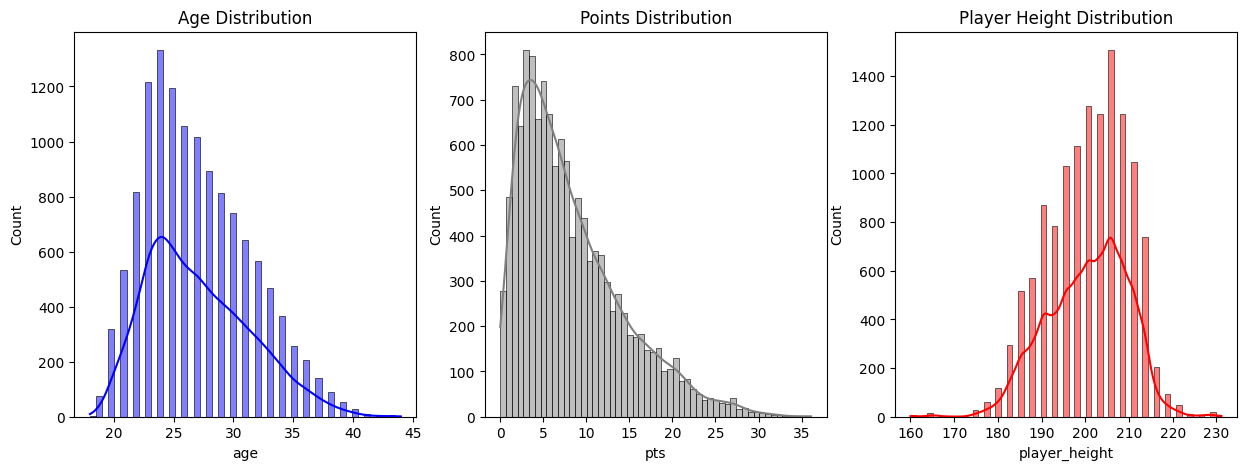

<Figure size 1500x500 with 0 Axes>

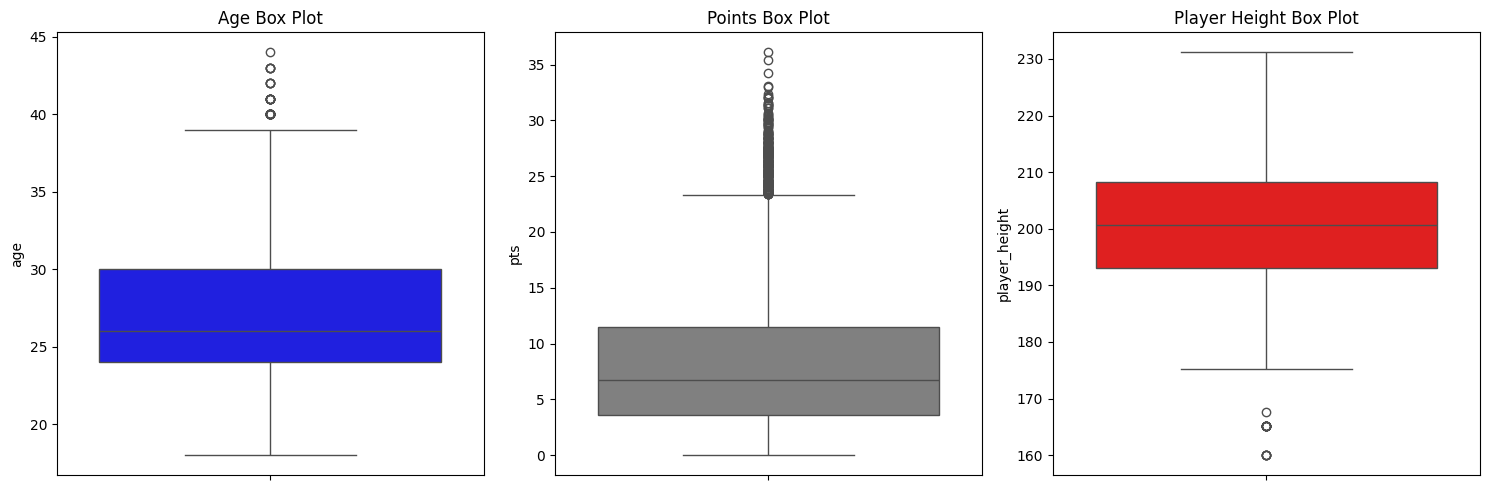

In [29]:
plt.figure(figsize=(15, 5))


# AGE DISTRIBUTION
plt.subplot(1, 3, 1)
sns.histplot(nba_data['age'], kde=True, color='blue')
plt.title('Age Distribution')

# PTS DISTRIBUTION
plt.subplot(1, 3, 2)
sns.histplot(nba_data['pts'], kde=True, color='grey')
plt.title('Points Distribution')

# HEIGHT DISTRIBUTION
plt.subplot(1, 3, 3)
sns.histplot(nba_data['player_height'], kde=True, color='red')
plt.title('Player Height Distribution')

plt.figure(figsize=(15, 5))
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

# AGE
plt.subplot(1, 3, 1)
sns.boxplot(y=nba_data['age'], color='blue')
plt.title('Age Box Plot')

# PTS
plt.subplot(1, 3, 2)
sns.boxplot(y=nba_data['pts'], color='grey')
plt.title('Points Box Plot')

# HEIGHT
plt.subplot(1, 3, 3)
sns.boxplot(y=nba_data['player_height'], color='red')
plt.title('Player Height Box Plot')

plt.tight_layout()
plt.show()


### Correlation Analysis

To understand how core performance metrics relate to one another, we conducted a correlation analysis on:

- **Points per Game (PTS)**
- **Rebounds (REB)**
- **Assists (AST)**
- **Net Rating**

The heatmap below highlights the strength and direction of these relationships:

- **PTS vs AST**: Moderately positive, suggesting higher scorers often contribute with assists.
- **PTS vs REB**: Weak correlation, indicating scoring and rebounding may operate more independently.
- **Net Rating** shows a mild to moderate relationship with other variables, reflecting its aggregate nature as a team performance metric.

In [31]:
relevant_columns = nba_data[['pts', 'reb', 'ast', 'net_rating']]

correlation_matrix = relevant_columns.corr()

correlation_matrix


,pts,reb,ast,net_rating
pts,1.000000,0.624509,0.664320,0.215199
reb,0.624509,1.000000,0.247841,0.187820
ast,0.664320,0.247841,1.000000,0.162865
net_rating,0.215199,0.187820,0.162865,1.000000


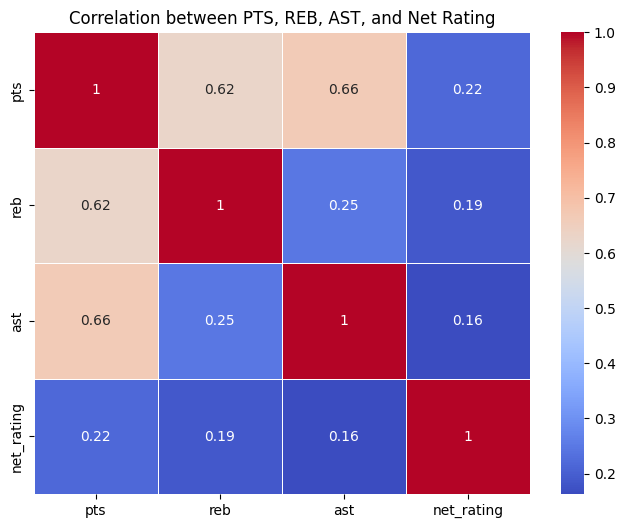

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation between PTS, REB, AST, and Net Rating')
plt.show()

### Grouping and Aggregation

To explore team and draft-year trends, we calculate the average **points (PTS)**, **rebounds (REB)**, and **assists (AST)** for each group of players, segmented by their:

- draft_year
- team_abbreviation

This allows us to:
- Analyze how draft classes have performed over time.
- Compare how different teams have developed or utilized their drafted talent.
- Identify eras or teams with especially strong or weak player contributions.

The output provides a structured overview of per-team player productivity across multiple seasons.


In [33]:
grouped_data = nba_data.groupby(['draft_year', 'team_abbreviation']).agg({
    'pts': 'mean',
    'reb': 'mean',
    'ast': 'mean'
}).reset_index()

grouped_data.rename(columns={
    'pts': 'avg_pts',
    'reb': 'avg_reb',
    'ast': 'avg_ast'
}, inplace=True)

grouped_data

,draft_year,team_abbreviation,avg_pts,avg_reb,avg_ast
0,1963,NJN,1.400000,1.400000,0.800000
1,1976,CHI,3.700000,2.100000,0.500000
2,1978,TOR,4.000000,1.300000,0.700000
3,1979,HOU,0.450000,1.050000,0.250000
4,1979,TOR,0.800000,1.000000,0.400000
...,...,...,...,...,...
1237,Undrafted,SEA,3.657576,2.272727,0.896970
1238,Undrafted,TOR,5.434444,2.463333,1.848889
1239,Undrafted,UTA,4.502532,1.860759,1.291139
1240,Undrafted,VAN,5.242857,2.385714,1.328571


## Time Series Analysis

This section tracks the **performance trajectory** of a single player — in this case, **Ja Morant** — by analyzing how his **points per game (PTS)** have evolved across seasons.

Steps included:
- Filtering the dataset to isolate Ja Morant’s statistics.
- Sorting by season to maintain chronological order.
- Plotting his pts (points per game) across each season.

This type of time series visualization helps:
- Evaluate player development year-over-year.
- Identify performance trends, peaks, or regressions.
- Inform decisions for fantasy leagues, trades, or historical comparisons.


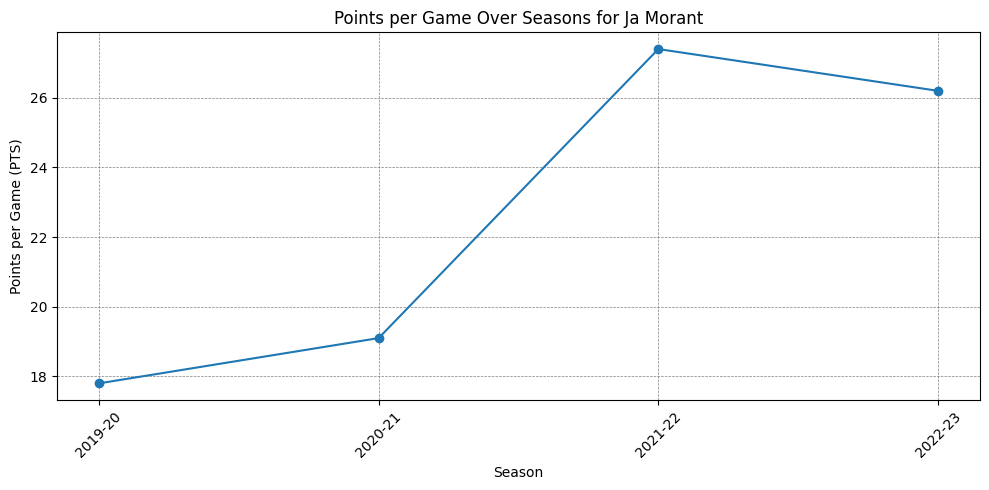

In [34]:
player_name = "Ja Morant"
player_data = nba_data[nba_data['player_name'] == player_name]
player_data = player_data.sort_values('season')
player_data.set_index('season', inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(player_data['pts'], marker='o', linestyle='-')
plt.title(f"Points per Game Over Seasons for {player_name}")
plt.xlabel('Season')
plt.ylabel('Points per Game (PTS)')
plt.xticks(rotation=45)
plt.grid(visible=True, which='both', color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## Text Processing: College Insights

This section explores the college column to extract simple but useful textual insights.

- **Most Common College:** We determine which college has produced the highest number of NBA players in the dataset.
- **Unique Colleges Count:** We compute how many different colleges are represented overall.

This analysis helps highlight schools with strong pipelines to the NBA and provides context for scouting or historical comparisons.


In [35]:
most_common_college = nba_data['college'].mode()[0]
print(f"The most common college is: {most_common_college}")

unique_colleges = nba_data['college'].nunique()
print(f"The number of unique colleges is: {unique_colleges}")


The most common college is: Kentucky
The number of unique colleges is: 356


## Predictive Modeling: Linear Regression

In this section, we develop a simple **linear regression model** to predict a player's points per game (pts) based on physical and performance metrics.

#### Features Used:
- age
- player_height
- player_weight
- gp (games played)
- reb (rebounds)
- ast (assists)

#### Modeling Workflow:
1. Split the dataset into training and testing sets (80/20 split).
2. Train a linear regression model on the training set.
3. Evaluate model performance using:
   - **Mean Squared Error (MSE)**: Measures average squared difference between actual and predicted values.
   - **R² Score**: Indicates the proportion of variance explained by the model.

This model provides a foundational approach for understanding how basic player metrics correlate with scoring output in the NBA.


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = ['age', 'player_height', 'player_weight', 'gp', 'reb', 'ast']

X = nba_data[features]
y = nba_data['pts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Coefficients: \n', model.coef_)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-0.07411033  0.00340877 -0.02420111  0.03281864  1.10892359  1.65011846]
Mean squared error: 11.39
Coefficient of determination: 0.69


##bCluster Analysis: K-Means Clustering of NBA Players

In this section, we apply **K-Means Clustering** to group NBA players based on a variety of performance metrics. This unsupervised learning approach helps us discover natural groupings or "player archetypes" in the data.

#### Features Used:
- pts (points)
- reb (rebounds)
- ast (assists)
- net_rating (overall contribution to team performance)
- oreb_pct, `dreb_pct (offensive/defensive rebound percentage)
- usg_pct (usage rate)
- ts_pct (true shooting percentage)
- ast_pc` (assist rate)

#### Workflow:
1. **Preprocessing:**
   - Handle missing values with mean imputation.
   - Standardize the features to have zero mean and unit variance.

2. **Modeling:**
   - Fit a K-Means model with k=5 clusters.
   - Assign cluster labels back to the original dataset.
   - Calculate mean feature values per cluster to interpret each group’s characteristics.

3. **Visualization:**
   - Use PCA to reduce dimensions for visualization.
   - Plot the clusters in 2D space to examine separation and density.

This method allows us to segment players based on statistical profiles — useful for scouting, team construction, and strategic matchups.


<ipython-input-37-232bb84d6292>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_for_clustering.fillna(data_for_clustering.mean(), inplace=True)


cluster
3    5118
1    3399
0    1835
2    1798
4     694
Name: count, dtype: int64
               pts       reb       ast  net_rating  oreb_pct  dreb_pct  \
cluster                                                                  
0        14.147738  7.934823  1.929700    0.613079  0.085223  0.208490   
1         4.468608  3.486437  0.600088   -2.300883  0.095291  0.181920   
2        16.440100  4.048665  5.250501    1.237208  0.025610  0.109748   
3         6.624893  2.217390  1.585639   -1.421864  0.027425  0.103280   
4         1.249280  0.960086  0.431988  -24.274928  0.040104  0.114720   

          usg_pct    ts_pct   ast_pct  
cluster                                
0        0.214223  0.554623  0.104313  
1        0.157475  0.521815  0.064432  
2        0.238325  0.542868  0.270824  
3        0.175790  0.517032  0.141125  
4        0.165661  0.255218  0.101686  


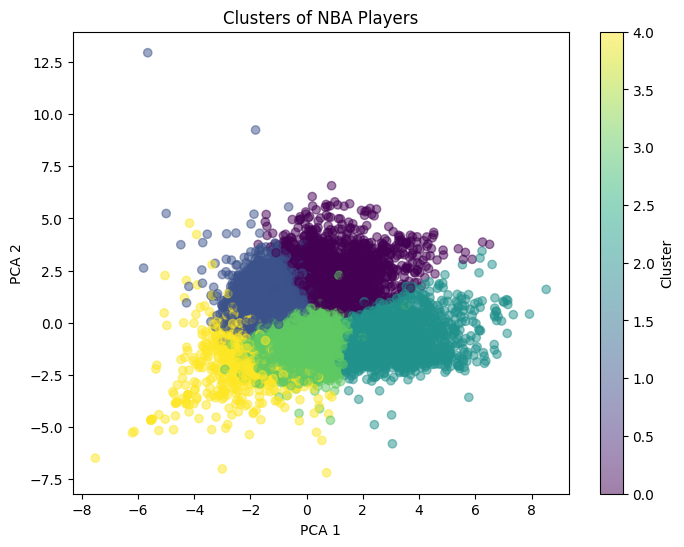

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

metrics = ['pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
data_for_clustering = nba_data[metrics]
data_for_clustering.fillna(data_for_clustering.mean(), inplace=True)
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)


kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_for_clustering_scaled)
labels = kmeans.labels_
nba_data['cluster'] = labels

print(nba_data['cluster'].value_counts())
cluster_means = nba_data.groupby('cluster')[metrics].mean()
print(cluster_means)


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_for_clustering_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=nba_data['cluster'], alpha=0.5, cmap='viridis')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters of NBA Players')
plt.colorbar(scatter, label='Cluster')
plt.show()



## Classification: Predicting High-Impact vs. Low-Impact Colleges

In this section, we build a **Random Forest Classifier** to determine whether a player’s college should be labeled as “High-impact” or “Low-impact” based on the performance of its alumni.

#### Objective:
To assess the long-term player output from each college by calculating the **average points per game (PTS)** across all its players. Colleges in the **top 25%** (above the 75th percentile) are considered "High-impact."

#### Workflow:
1. **Label Generation:**
   - Aggregate average PTS by college.
   - Define a binary target variable: "High-impact" or "Low-impact".

2. **Feature Selection:**
   - Use relevant performance metrics like age, height, weight, PTS, REB, AST, net_rating, usg_pct, etc.

3. **Preprocessing:**
   - Apply **StandardScaler** to normalize input features.

4. **Modeling:**
   - Use **Random Forest Classifier** for its robustness and ability to handle non-linear relationships.

5. **Evaluation:**
   - Output includes a **confusion matrix** and **classification report**, showcasing the model’s accuracy, precision, recall, and F1-score.

This model helps quantify the historical performance impact of college programs on NBA success and can guide scouting or talent evaluation decisions.


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

nba_data = nba_data.dropna(subset=['college'])

college_performance = nba_data.groupby('college')['pts'].mean()
high_impact_threshold = college_performance.quantile(0.75)
nba_data['college_impact'] = nba_data['college'].apply(lambda x: 'High-impact' if college_performance[x] >= high_impact_threshold else 'Low-impact')
features = ['age', 'player_height', 'player_weight', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
X = nba_data[features]
y = nba_data['college_impact']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


<ipython-input-40-e50c3565d88d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_data['college_impact'] = nba_data['college'].apply(lambda x: 'High-impact' if college_performance[x] >= high_impact_threshold else 'Low-impact')


[[1160  234]
 [ 471  333]]
              precision    recall  f1-score   support

 High-impact       0.71      0.83      0.77      1394
  Low-impact       0.59      0.41      0.49       804

    accuracy                           0.68      2198
   macro avg       0.65      0.62      0.63      2198
weighted avg       0.67      0.68      0.66      2198



## Time Series Forecasting: Predicting Player Points Using ARIMA and LSTM

In this section, we forecast **Ja Morant’s** points for the upcoming NBA season using two time series modeling techniques: **ARIMA** and **LSTM**.

### Data Preparation
- Converted the season string (e.g., "2018-19") into a datetime format based on the start year.
- Filtered and sorted Ja Morant’s records by season_start_date for accurate time series sequencing.
- Used pts (points per game) as the target metric.

In [41]:
nba_data['season_start_year'] = nba_data['season'].apply(lambda x: int(x.split('-')[0]))
nba_data['season_start_date'] = pd.to_datetime(nba_data['season_start_year'], format='%Y')

nba_data['pts'] = pd.to_numeric(nba_data['pts'], errors='coerce')
nba_data = nba_data.sort_values('season_start_date')

player_name = 'Ja Morant'
player_data = nba_data[nba_data['player_name'] == player_name]
player_data.set_index('season_start_date', inplace=True)



### ARIMA Model
- **ARIMA (1,1,1)** was selected for its balance between autoregression, differencing, and moving average.
- This statistical model is suited for short-term forecasting with limited historical data.
- Forecasted next season’s point average with a simple .forecast(steps=1).

In [42]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(player_data['pts'], order=(1,1,1))
arima_results = arima_model.fit()

arima_forecast = arima_results.forecast(steps=1)[0]
print(f"ARIMA forecast for {player_name}'s pts in the next season: {arima_forecast}")



ARIMA forecast for Ja Morant's pts in the next season: 25.955392845980988


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
<ipython-input-42-cde9bcc24262>:6: FutureWarning: Series.__getitem__ treating keys as p



### LSTM Model
- Scaled the pts series using **MinMaxScaler** to improve LSTM training performance.
- Created lag-based sequences with a **2-time step window** to capture short-term dependencies.
- Built a 2-layer **LSTM** model followed by a **dense output layer** for regression.
- Trained over **100 epochs** with batch size 1 to simulate time series learning.
- Inverse-transformed the prediction back to the original scale to interpret results.


In [43]:
# LTSM MODEL

from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_pts = scaler.fit_transform(player_data['pts'].values.reshape(-1,1))

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 2
X, y = create_dataset(scaled_pts, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X, y, epochs=100, batch_size=1, verbose=1)

lstm_forecast_scaled = lstm_model.predict(X[-1].reshape(1, time_step, 1))
lstm_forecast = scaler.inverse_transform(lstm_forecast_scaled)
print(f"LSTM forecast for {player_name}'s pts in the next season: {lstm_forecast[0][0]}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.9979
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.9859
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.9738
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.9615
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.9490
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.9360
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.9228
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.9091
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.8949
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.8803
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.8652
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.8496
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.8334
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.8166
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 0.7991
Epoch 16/100
1/1 ━━

## Deep Learning: Predicting NBA Player Performance with a Neural Network

In this section, we use a simple feedforward neural network to **predict NBA players' points per game (PTS)** based on physical attributes and advanced performance metrics.

#### Objective
Train a regression model to learn the nonlinear relationships between features like height, usage rate, assists, etc., and the player's scoring output.


### Feature Set
We selected 12 key features such as:
- age, player_height, player_weight
- Game performance: gp, reb, ast
- Advanced stats: net_rating, usg_pct, ts_pct, etc.

These were **standardized using StandardScaler** for better convergence during training.

In [45]:
features = ['age', 'player_height', 'player_weight', 'gp', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
X = nba_data[features]
y_regression = nba_data['pts']

X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model Architecture
- **Input Layer:** Matches the number of selected features (12).
- **Hidden Layers:**
  - 64 neurons (ReLU)
  - 32 neurons (ReLU)
- **Output Layer:** 1 neuron (Linear activation) for continuous regression output.
- **Loss Function:** Mean Squared Error (MSE)
- **Optimizer:** Adam (adaptive learning rate)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Evaluation
- The model was trained for **100 epochs** with a batch size of 10.
- Scatter plot of **actual vs. predicted PTS** shows prediction accuracy.
- A histogram of residuals helps visualize prediction errors and bias.


In [47]:
model.fit(X_train_scaled, y_train_reg, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 28.8815
Epoch 2/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1.3535
Epoch 3/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7811
Epoch 4/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6440
Epoch 5/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.5366
Epoch 6/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4696
Epoch 7/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4199
Epoch 8/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4038
Epoch 9/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3865
Epoch 10/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3457
Epoch 11/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.3286
Epoch 12/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3187
Epoch 13/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3123
Epoch 14/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3178
Epoch 15/100
880/880 ━━━━━━━━━━━━━━━━━━━━ 

In [48]:
loss_reg = model.evaluate(X_test_scaled, y_test_reg, verbose=1)
print('Regression Loss:', loss_reg)

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2703
Regression Loss: 0.2608519196510315


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


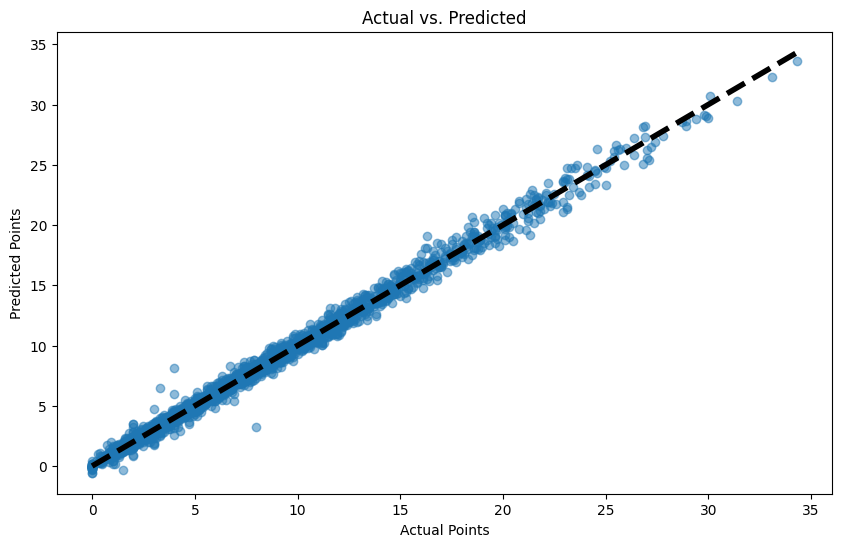

In [49]:
y_pred_reg = model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=4)
plt.show()


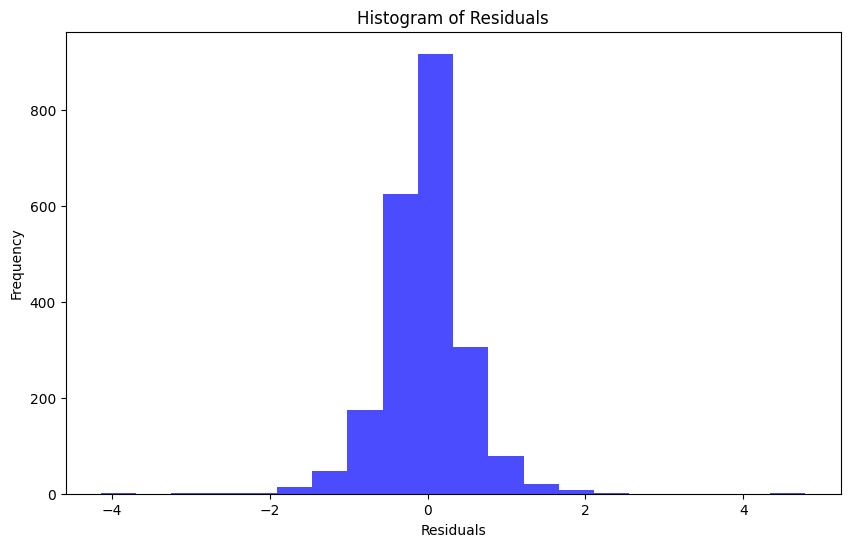

In [50]:
residuals = y_test_reg - y_pred_reg.flatten()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, alpha=0.7, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


## Sample Player Inference

In this final step, we test the trained neural network by feeding it a sample player's profile. The player has:

- Age: 26  
- Height: 200 cm  
- Weight: 95 kg  
- Games Played: 70  
- Rebounds per game: 6.0  
- Assists per game: 5.0  
- Net Rating: 5.5  
- Offensive Rebound %: 3.0%  
- Defensive Rebound %: 15.0%  
- Usage Rate: 22.0%  
- True Shooting %: 58.0%  
- Assist Rate: 20.0%

These features are scaled and passed into the model, which outputs the predicted number of points per game.

This allows us to evaluate model performance on real-like test cases and demonstrates its capability to support hypothetical player evaluations and scouting insights.


In [53]:
features = ['age', 'player_height', 'player_weight', 'gp', 'reb', 'ast',
            'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']
test_player = np.array([[26, 200, 95, 70, 6.0, 5.0, 5.5, 0.03, 0.15, 0.22, 0.58, 0.20]])
test_player_scaled = scaler.transform(test_player)
predicted_pts = model.predict(test_player_scaled)
print(f"Predicted points per game: {predicted_pts[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted points per game: 18.59


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
